# **Assessment for Applied Statistics module**

**by Matthias Wiedemann**

Student at [ATU](https://www.atu.ie/).

<img src="https://studenthub.atu.ie/assets/ATU_Logo.fa93bf0a.svg" alt="ATU Logo" width="300" height="100">

The assessment instructions can be found [here](https://github.com/ianmcloughlin/applied-statistics/blob/main/assessment/assessment.md).

The following libraries are required to complete the four tasks:

In [ ]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistical functions.
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Data manipulation and analysis.
# https://pandas.pydata.org/pandas-docs/stable/reference/index.html
import pandas as pd  

## **Problem 1: Extending the Lady Tasting Tea**

In the original Fisher’s Lady Tasting Tea experiment there are 8 cups total: 4 tea-first and 4 milk-first. 

The lady claims she can distinguish them.

What we have learned in the [lecture](https://github.com/ianmcloughlin/applied-statistics/blob/main/materials/lady-tasting-tea.ipynb) is that if she guesses all 8 correct, the probability (the p-value if she gets all 8 correct under the null hypothes is) of doing that by chance is:

$$
P = \frac{1}{\binom{8}{4}} = \frac{1}{70} \approx 0.0143
$$

For the extended experiment, 12 cups total, 8 tea-first and 4 milk-first we need to recalculate the Binomial Coefficient, ("N choose K)," and will use the same code as shown in the lecture:

### 1.1 Cups of tea

This code block outlines the layout of the experiment or the parameters:

In [27]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

### 1.2 We use math.comb(n, k) to calculate the number of ways to choose k elements from a set of n elements where the order of the chosen elements does not matter and no element is selected more than once:

In [28]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first) # https://docs.python.org/3/library/math.html

# Show.
ways

495

The total number of unique ways to choose 4 items from 12 is 495. This value is the binominal coefficient for the extended experiment.

Let's apply this to 12 cups total, 8 tea-first and 4 milk-first, and calculate the p-value:

$$
P = \frac{1}{\binom{12}{4}} = \frac{1}{495} \approx 0.00202
$$

The p-value is approximately 0.00202, meaning there is about a 0.2% chance of correctly identifying all four cups purely by random guessing in one trial.

Let's recap and compare the value from the original with the one from the extended experiment:

| Design   | Cups | Milk-first | P(correct all by chance) |
| -------- | ---- | ---------- | ------------------------ |
| Original | 8    | 4          | 1/70 ≈ 0.0143            |
| Extended | 12   | 4          | 1/495 ≈ 0.0020           |

What this table shows is that the extended design reduces the probability of guessing all correctly by chance by about ×7 what means it’s more stringent and way less likely that someone could pass by luck.

The primary focus of these steps was the calculation of the Binomial Coefficient. While the p-value was determined here, its deeper context and role become relevant later when we discuss hypothesis testing. Further readings regarding the Binomial Coefficient can be found here:

https://mathworld.wolfram.com/BinomialCoefficient.html

### 1.3 Ordering of Results

In [29]:
# The cup labels.
labels = list(range(no_cups)) # https://docs.python.org/3/library/stdtypes.html#range

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [30]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first)) # https://docs.python.org/3/library/itertools.html#itertools.combinations

# Show.
combs[:10]

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4)]

In [31]:
# Number of combinations.
len(combs)

495

### 1.4 Hypothesis Testing

In order to carry out meaningful hypothesis testing a number of calculations are necessary. The following code blocks were copied from the [lecture material](https://github.com/ianmcloughlin/applied-statistics/blob/main/materials/lady-tasting-tea.ipynb) for this module: 

In [32]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[1, 3, 5, 10]

In [33]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{1, 3, 5, 10}

In [34]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

# Loop through the combinations.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3) 2 {1, 3}
(0, 1, 2, 4) 1 {1}
(0, 1, 2, 5) 2 {1, 5}
(0, 1, 2, 6) 1 {1}
(0, 1, 2, 7) 1 {1}
(0, 1, 2, 8) 1 {1}
(0, 1, 2, 9) 1 {1}
(0, 1, 2, 10) 2 {1, 10}
(0, 1, 2, 11) 1 {1}
(0, 1, 3, 4) 2 {1, 3}
(0, 1, 3, 5) 3 {1, 3, 5}
(0, 1, 3, 6) 2 {1, 3}
(0, 1, 3, 7) 2 {1, 3}
(0, 1, 3, 8) 2 {1, 3}
(0, 1, 3, 9) 2 {1, 3}
(0, 1, 3, 10) 3 {1, 10, 3}
(0, 1, 3, 11) 2 {1, 3}
(0, 1, 4, 5) 2 {1, 5}
(0, 1, 4, 6) 1 {1}
(0, 1, 4, 7) 1 {1}
(0, 1, 4, 8) 1 {1}
(0, 1, 4, 9) 1 {1}
(0, 1, 4, 10) 2 {1, 10}
(0, 1, 4, 11) 1 {1}
(0, 1, 5, 6) 2 {1, 5}
(0, 1, 5, 7) 2 {1, 5}
(0, 1, 5, 8) 2 {1, 5}
(0, 1, 5, 9) 2 {1, 5}
(0, 1, 5, 10) 3 {1, 10, 5}
(0, 1, 5, 11) 2 {1, 5}
(0, 1, 6, 7) 1 {1}
(0, 1, 6, 8) 1 {1}
(0, 1, 6, 9) 1 {1}
(0, 1, 6, 10) 2 {1, 10}
(0, 1, 6, 11) 1 {1}
(0, 1, 7, 8) 1 {1}
(0, 1, 7, 9) 1 {1}
(0, 1, 7, 10) 2 {1, 10}
(0, 1, 7, 11) 1 {1}
(0, 1, 8, 9) 1 {1}
(0, 1, 8, 10) 2 {1, 10}
(0, 1, 8, 11) 1 {1}
(0, 1, 9, 10) 2 {1, 10}
(0, 1, 9, 11) 1 {1}
(0, 1, 10, 11) 2 {1, 10}
(0, 2, 3, 4) 1 {3}
(0, 2, 3, 5) 2 {3,

In [35]:
# Show the overlaps.
print(no_overlaps)

[2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 

In [36]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

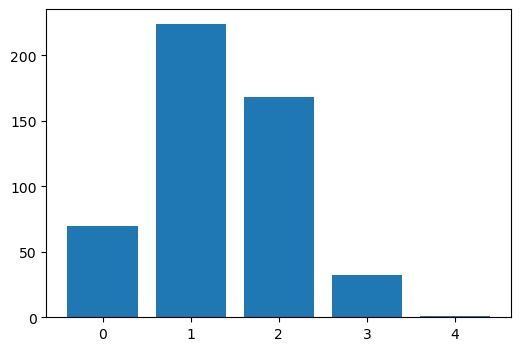

In [37]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);


What we have seen in the original design is the probability that she (randomly) selects the four correct cups is
1 in 70 (1/70) or 0.014 hence a 1.4 % chance; and the probability that she (randomly) selects at least three correct cups is (16 + 1) / 70 or 0.24 a 24 % chance, 1 in 4. With the extended design those figures change greatly. The number of overlaps that occur increases but as outlined above, the probablility that she selects four correct decreases to 0.002 (1/495) or a 0.2 % chance. By looking at the calculated arrays we see that there are now logically 32 combinations to guess at least 3 cups right as opposed to 16 in the original design because the number of cups (tea first) has doubled from 4 to 8, so the probability that she (randomly) selects at least three correct cups under the extended design is (32 + 1)/495; 32 combinations plus 1 (the only combination with all 4 correct). The result is 0.06 or in 6 trials in 100 she may get 3 right and 0.34 or 34 % that she guesses 2 correct and there is 45% probability that she gets a least 1 correct (224 + 1)/495.

| **Design**   | **Total Cups** | **Milk-First Cups** | **Event**             | **Favorable Combinations** | **Total Combinations** | **Probability (Fraction)** | **Probability (Decimal)** | **Approx. % Chance** | **Approx. Odds** | **p-Value** |
| ------------ | -------------- | ------------------- | --------------------- | -------------------------- | ---------------------- | -------------------------- | ------------------------- | -------------------- | ---------------- | ----------- |
| **Original** | 8              | 4                   | All 4 correct         | 1                          | 70                     | 1 / 70                     | 0.014                     | 1.4 %                | 1 in 70          | 0.014       |
|              |                |                     | At least 3 correct    | (16 + 1) / 70              | 70                     | 17 / 70                    | 0.243                     | 24 %                 | ≈ 1 in 4         | 0.243       |
| **Extended** | 12             | 4                   | All 4 correct         | 1                          | 495                    | 1 / 495                    | 0.002                     | 0.2 %                | 1 in 495         | 0.002       |
|              |                |                     | At least 3 correct    | (32 + 1) / 495             | 495                    | 33 / 495                   | 0.067                     | 6.7 %                | ≈ 1 in 15        | 0.067       |
|              |                |                     | At least 2 correct | (168 + 1) / 495                        | 495                    | 169 / 495                         | 0.341                      | 34 %                 | ≈ 1 in 3         | 0.341        |
|              |                |                     | At least 1 correct    | (224 + 1) / 495            | 495                    | 225 / 495                  | 0.455                     | 45 %                 | ≈ 1 in 2         | 0.455       |


The smaller p-value (≈0.002) achieved with the 12-cup setup signifies a more powerful test than the original setup (p-value ≈0.0143), providing much stronger evidence against the null hypothesis of random guessing. In statistical terms the result of p=0.002 is highly significant (less than the common 0.01 threshold appropriate for this kind of test), eliminating any need to relax the significance level. The extended design makes the test much more discriminating — for example:

p=0.014
p=0.014 (original) → modest evidence.

p=0.002
p=0.002 (extended) → very strong evidence. 

For further exploration and a comprehensive understanding of the p-value and statistical significance, refer to the following resources:

https://www.statology.org/understanding-statistical-significance/ \
https://www.statswithr.com/foundational-statistics/understanding-levels-of-significance-in-statistics \
https://www.statology.org/p-values-explained-in-plain-english-with-visuals \
https://www.geeksforgeeks.org/machine-learning/p-value 

### 1.5 Probability simulation 

In line with the [task](https://github.com/ianmcloughlin/applied-statistics/blob/main/assessment/problems.md) requirements, we will simulate the experiment by repeatedly shuffling the cups at random and calculating the probability that the participant correctly identifies all cups purely by chance.

In [ ]:
# Original setup parameters:

no_cups = 8                  # Total number of cups (N). 
no_cups_milk_first = 4       # Number of 'correct' milk-first cups (K).
no_guesses = 4               # Number of cups selected correctly (milk-first).
no_trials = 100000           # Number of trials.

# Define the labels:
# Array with 4 'correct' correct cups: [1] 
# Array with 4 'incorrect' cups: [0]
cup_labels = np.array([1] * no_cups_milk_first + [0] * (no_cups - no_cups_milk_first))

# Simulation.
# Count.
perfect_matches = 0

# For loop.
for _ in range(no_trials):
    # Randomly shuffle the 8 cup labels.
    shuffled_labels = np.random.permutation(cup_labels)

    # Simulate the lady picking 4 cups (the first 4 positions).
    selections = shuffled_labels[:no_guesses]

    # A perfect match occurs if all 4 selections were 'correct' cups (sum == 4).
    if np.sum(selections) == no_cups_milk_first:
        perfect_matches += 1

# Calculate the simulated probability.
simulated_probability = perfect_matches / no_trials

# Calculate theoretical_combinations using itertools.
theoretical_combinations = len(list(itertools.combinations(range(no_cups), no_cups_milk_first)))

# Calculate the theoretical probability.
theoretical_probability = 1 / theoretical_combinations

# Print.
print(f"Total Cups (N): {no_cups}, Correct Cups (K): {no_cups_milk_first}")
print(f"Total Trials: {no_trials}")
print(f"Successes: {perfect_matches}")
print("-" * 50)
print(f"Simulated Probability (by chance): {simulated_probability:.8f}")
print(f"Theoretical Combinations (8 choose 4): {theoretical_combinations}")
print(f"Theoretical Probability (1/{theoretical_combinations}): {theoretical_probability:.8f}")

Total Cups (N): 8, Correct Cups (K): 4
Total Trials: 100000
Successes: 1407
--------------------------------------------------
Simulated Probability (by chance): 0.01407000
Theoretical Combinations (8 choose 4): 70
Theoretical Probability (1/70): 0.01428571


As expected, simulating the experiment 100,000 times yields approximately 1,405 successful trials, which aligns closely with the theoretical results discussed above. Let us now compare these findings with the extended experiment:

In [39]:
# Extended setup parameters:
no_cups = 12                 # Total number of cups (N).
no_cups_milk_first = 4       # Number of 'correct' milk-first cups (K).
no_guesses = 4               # Number of cups selected (participant guesses 4 milk-first).
no_trials = 100000           # Number of simulation trials.

# Define the labels:
# Array with 4 'correct' correct cups: [1] 
# Array with 4 'incorrect' cups: [0]
cup_labels = np.array([1] * no_cups_milk_first + [0] * (no_cups - no_cups_milk_first))

# Simulation.

# Count.
perfect_matches = 0

# For loop.
for _ in range(no_trials):
    # Randomly shuffle the 12 cup labels.
    shuffled_labels = np.random.permutation(cup_labels)

    # Simulate the lady picking 4 cups (the first 4 positions).
    selections = shuffled_labels[:no_guesses]

    # A perfect match occurs if all 4 selections were 'correct' milk-first cups
    if np.sum(selections) == no_cups_milk_first:
        perfect_matches += 1

# Calculate simulated probability.
simulated_probability = perfect_matches / no_trials

# Calculate theoretical probability (1 / C(12, 4)).
theoretical_combinations = len(list(itertools.combinations(range(no_cups), no_cups_milk_first)))
theoretical_probability = 1 / theoretical_combinations

# Print results.
print(f"Total Cups (N): {no_cups}, Correct Cups (K): {no_cups_milk_first}")
print(f"Total Trials: {no_trials}")
print(f"Successes: {perfect_matches}")
print("-" * 60)
print(f"Simulated Probability (by chance): {simulated_probability:.8f}")
print(f"Theoretical Combinations (12 choose 4): {theoretical_combinations}")
print(f"Theoretical Probability (1/{theoretical_combinations}): {theoretical_probability:.8f}")

Total Cups (N): 12, Correct Cups (K): 4
Total Trials: 100000
Successes: 184
------------------------------------------------------------
Simulated Probability (by chance): 0.00184000
Theoretical Combinations (12 choose 4): 495
Theoretical Probability (1/495): 0.00202020


Again, the simulation results validate the theoretical estimate: a probability of 1/495 (≈0.0020) produced about 201 successes in 100,000 runs. When contrasted with the 1,420 successes from the original experiment, this outcome is approximately seven-fold less likely, thereby reinforcing the findings presented in 1.5.

## **Problem 2: Normal Distribution**
As per [assessment instructions](https://github.com/ianmcloughlin/applied-statistics/blob/main/assessment/assessment.md):

> Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased. 



### 2.1 Run the simulation, generate a NumPy array of the results:

In [40]:
# Simulation Parameters.
num_samples = 100000
sample_size = 10

# Create two-dimensional NumPy array. 100,000 samples of size 10. 
data = np.random.randn(num_samples, sample_size)

# Compute the sample standard deviation (ddof=1) & (ddof=0) for each sample. 
sample_sd = data.std(axis=1, ddof=1) # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.std.html
population_sd = data.std(axis=1, ddof=0) # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.std.html

Before proceeding to the second part of the task—the actual plot—let's further examine the meaning of ddof=1 (sample standard deviation) and ddof=0 (population standard deviation) to establish the necessary context.

> Definition: Degrees of freedom (df) represent the number of independent values in a dataset that are free to vary while still satisfying the statistical constraints imposed on the data. In other words, it’s the number of independent pieces of information available to estimate another piece of information.

This quote was taken from https://www.statology.org/understanding-degrees-freedom-statistics/ 



| Type              | Formula                                         | `ddof` value | Divides by | Used when                                      |
| ----------------- | ----------------------------------------------- | ------------ | ---------- | ---------------------------------------------- |
| **Population SD** | $ \sqrt{\frac{\sum (x_i - \mu)^2}{N}} $       | `ddof=0`     | ( N )      | You have **the entire population**             |
| **Sample SD**     | $ \sqrt{\frac{\sum (x_i - \bar{x})^2}{N - 1}} $ | `ddof=1`     | ( N - 1 )  | You have **a sample**, not the full population |

Degrees of freedom (DDOF) is a crucial factor when calculating the sample standard deviation. Setting DDOF to 1 (n−1) provides an unbiased estimator of the true population variance, which is the standard practice for real-world sample statistics. Conversely, setting DDOF to 0 (n) yields the standard deviation assuming the data is the entire population, a scenario that is rarely feasible in practical applications. The purpose of this exercise is to illustrate the disparity between these two calculation methods using the same input data and visualize the results in a plot.

For further exploration and a comprehensive understanding of Degrees of Freedom, Standard Deviation and Population Variance, refer to the following resources:

https://www.statology.org/understanding-degrees-freedom-statistics \
https://statisticsbyjim.com/basics/standard-deviation \
https://www.cuemath.com/data/population-variance 

Bessel's Correction is a crucial statistical principle applied when setting DDOF=1. Although not explicitly discussed, it is the mechanism that corrects for the bias inherent in using the sample mean (xˉ) instead of the true population mean (μ), ensuring the calculated sample standard deviation is an unbiased estimator of the population's "true SD.":

https://www.statisticshowto.com/bessels-correction

### 2.2 Plot:

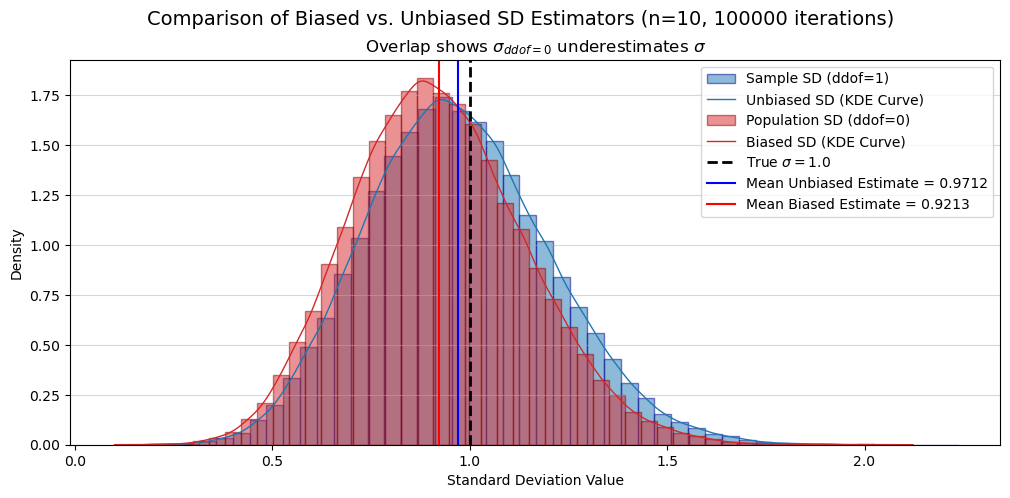

In [ ]:
# Plotting (matplotlib). https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Create figure and axis.
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
fig.suptitle(f'Comparison of Biased vs. Unbiased SD Estimators (n={sample_size}, {num_samples} iterations)', fontsize=14)

# Plot 1: Unbiased Estimator (ddof=1).
# Use transparency (alpha=0.5) to see the overlap.
ax.hist(sample_sd, bins=50, density=True, color='#1f77b4', alpha=0.5, edgecolor='darkblue', 
        label='Sample SD (ddof=1)')

# Use the minimum and maximum observed SD across both samples to define the range.
x_range = np.linspace(np.min(sample_sd), np.max(population_sd), 500)

# Calculate KDE for Unbiased Estimator.
kde_sample_sd = stats.gaussian_kde(sample_sd)
# Plot the smooth curve over the histogram.
ax.plot(x_range, kde_sample_sd(x_range), color='#1f77b4', linewidth=1, label='Unbiased SD (KDE Curve)')

# Plot 2: Biased Estimator (ddof=0).
ax.hist(population_sd, bins=50, density=True, color='#d62728', alpha=0.5, edgecolor='darkred',
        label='Population SD (ddof=0)')

kde_population_sd = stats.gaussian_kde(population_sd)
# Plot the smooth curve over the histogram.
ax.plot(x_range, kde_population_sd(x_range), color='#d62728', linewidth=1, label='Biased SD (KDE Curve)')


# True population standard deviation (sigma = 1.0).
ax.axvline(1.0, color='black', linestyle='--', linewidth=2, label='True $\\sigma = 1.0$')

# Mean SD Estimate for Unbiased (ddof=1) - should be close to 1.0.
ax.axvline(sample_sd.mean(), color='blue', linestyle='-', linewidth=1.5, 
           label=f'Mean Unbiased Estimate = {sample_sd.mean():.4f}')

# Mean SD Estimate for Biased (ddof=0) - should be less than 1.0
ax.axvline(population_sd.mean(), color='red', linestyle='-', linewidth=1.5, 
           label=f'Mean Biased Estimate = {population_sd.mean():.4f}')


ax.set_title(f'Overlap shows $\\sigma_{{ddof=0}}$ underestimates $\\sigma$')
ax.set_xlabel('Standard Deviation Value')
ax.set_ylabel('Density')
ax.legend()
ax.grid(axis='y', alpha=0.5)

plt.show()

### 2.3 Analyzing the differences in the plot:

The differences in the plot arise from the choice of Degrees of Freedom (DDOF) used in computing the standard deviation — also known as Bessel’s Correction.

**DDOF=0 (Population SD)**
Using DDOF=0 divides by *n* and assumes the data represent the entire population.

- Plot Observation: The curve for DDOF=0 appears higher and slightly narrower (less spread).

- Statistical Meaning: This method is biased, as it underestimates variability by assuming the sample mean is the true population mean. The ddof=0 estimates are systematically pulled closer to the origin (zero) and away from the true population value (σ=1.0).

**DDOF=1 (Sample SD)**
Using DDOF=1 divides by *n − 1* and applies Bessel’s Correction.

- Plot Observation: The curve for DDOF=1 is slightly wider.

- Statistical Meaning: This adjustment accounts for the loss of one degree of freedom when estimating the population mean, producing an unbiased estimator of the true population standard deviation.

How the Plot Relates to σ (True SD):

Both curves estimate the population standard deviation (σ), but DDOF=1 (with Bessel’s correction) provides an unbiased estimate, centering closer to the true σ, while DDOF=0 slightly underestimates it.

### 2.4 Impact of Increasing Sample Size ***(n)***:
If the sample size *(n)* is significantly increased, the differences observed between the DDOF=0 and DDOF=1 results will decrease. This means the two plotted distributions (for DDOF=0 and DDOF=1) will become virtually indistinguishable from one another as the sample size increases.

## **Problem 3: t-Tests**
As per [assessment instructions](https://github.com/ianmcloughlin/applied-statistics/blob/main/assessment/assessment.md):

> A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d = 0 , 0.1 , 0.2 , … , 1.0 , repeat the following simulation 1,000 times:

    1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
    2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
    3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against d , and explain how the type II error rate changes as the difference in means increases.

### 3.1 Simulation parameters:

In [42]:
sample_size = 100
num_simulations = 1000
d_values = np.arange(0, 1.01, 0.1) # Start at 0, increase by 0.1 stop before 1.01.
type2_errors = [] # Creates an empty Python list that will store the Type II error rates for each value of d.
non_rejections_rates = [] # Creates an empty Python list that will store the non-rejection rates for each value of p.
alpha = 0.05 # Significance level.

### 3.2 Simulation loop:
3.2.1 Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1. Repeat 1000 times.

In [ ]:
for d in d_values: # Outer loop. It iterates over the list of true mean differences (d).
    errors = 0  # Count Type II errors for this value of d. This counter will track how many times the test failed to reject the null hypothesis (H0).
    
    for _ in range(num_simulations): # Inner loop. It repeats the sampling and testing process 1,000 times (num_simulations) to estimate the true probability.
        # Sample 1: N(0, 1).
        sample1 = np.random.normal(0, 1, sample_size) # Generates a sample of size 100 (sample_size) from the standard normal distribution N(μ=0,σ=1).
        
        # Sample 2: N(d, 1)
        sample2 = np.random.normal(d, 1, sample_size) # Generates a sample of size 100 (sample_size) from a normal distribution with the specified mean difference d and σ=1: N(μ=d,σ=1).
        
        # Two-sample t-test (H0: means equal).
        t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=True) # Runs the Hypothesis Test. Executes the independent samples t-test. The null hypothesis (H0​) is that the means of the two populations are equal (μ1​=μ2​). It returns the t-statistic and the p-value.
        
        # Type II error: fail to reject H0 when it is false (d > 0).
        if d > 0 and p_value >= 0.05: # Error Check. This is the core logic that defines the Type II error: d > 0: Ensures the null hypothesis (H0​) is false or p_value >= 0.05: Means the test fails to reject H0​ at the α=0.05 significance level.
            errors += 1               # If both conditions are met, the test made a Type II error (it missed a true effect), and errors is incremented.
                
    type2_rate = errors / num_simulations # After 1,000 simulations, this calculates the proportion of times a Type II error occurred.
    type2_errors.append(type2_rate) # Stores the calculated β value for later plotting.
    print(f"d={d:.1f}  Type II Error Rate = {type2_rate:.3f}")

    # https://docs.python.org/3/tutorial/controlflow.html#for-statements

d=0.0  Type II Error Rate = 0.000
d=0.1  Type II Error Rate = 0.884
d=0.2  Type II Error Rate = 0.694
d=0.3  Type II Error Rate = 0.430
d=0.4  Type II Error Rate = 0.186
d=0.5  Type II Error Rate = 0.054
d=0.6  Type II Error Rate = 0.014
d=0.7  Type II Error Rate = 0.002
d=0.8  Type II Error Rate = 0.000
d=0.9  Type II Error Rate = 0.000
d=1.0  Type II Error Rate = 0.000


The generated numbers show that there is a clear inverse relationship or negative correlation between the mean difference ($d$) and the Type II Error Rate ($\beta$):

As the mean difference ($d$) increases, the Type II Error Rate decreases.
This occurs because a larger "signal" (the mean difference) is easier for the statistical test to distinguish from the "noise" (the standard deviation/variance).

At $d = 0.0$ (The Null Case): The error rate is $0.000$. When there is no true difference, it is impossible to commit a Type II error (which is defined as failing to detect a difference that exists). The non-rejection rate here actually represents the Confidence Level ($1 - \alpha$).

At $0.1 \le d \le 0.3$ (Small Effects): The error rate is very high (starting at $0.884$). The test is "blind" to these subtle differences nearly 90% of the time, meaning the test is underpowered for these values.

At $d = 0.5$ (The "Tipping Point"): The error rate drops significantly to $0.054$. At this point, the test has a ~95% chance (Statistical Power, $1 - \beta$) of correctly identifying the effect.

At $d \ge 0.8$ (Large Effects): The error rate reaches $0.000$. The difference is now so large relative to the noise that the test detects it in every single simulation.

3.2.2 Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.

In [44]:
# Perform the independent two-sample t-test.
t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)

# Hypothesis test decision.
reject_null = p_value < alpha

print(f"The observed difference is {t_stat:.4f} standard errors below the null value (T-statistic)")
print(f"P-value: {p_value:.4f}")
print(f"Reject H0 (null hypothesis) (p < 0.05)?  {reject_null}")

The observed difference is -5.6205 standard errors below the null value (T-statistic)
P-value: 0.0000
Reject H0 (null hypothesis) (p < 0.05)?  True


3.3.3 Record the proportion of times the null hypothesis is not rejected.

In [ ]:
# This logic is similar to the previous code block, but instead of counting Type II errors, it counts the number of times the null hypothesis is not rejected (p-value ≥ 0.05) for each value of d.

for d in d_values:
    non_rejections = 0   
    
    for _ in range(num_simulations):
        sample1 = np.random.normal(0, 1, sample_size)
        sample2 = np.random.normal(d, 1, sample_size)
        
        # t-test
        t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)
        
        # Count non-rejections (p ≥ 0.05).
        if p_value >= 0.05:
            non_rejections += 1
    
    # Compute proportion.
    rate = non_rejections / num_simulations
    non_rejections_rates.append(rate)
    
    print(f"d={d:.1f}  Proportion of times the null hypothesis NOT rejected = {rate:.3f}")

d=0.0  Proportion of times the null hypothesis NOT rejected = 0.950
d=0.1  Proportion of times the null hypothesis NOT rejected = 0.886
d=0.2  Proportion of times the null hypothesis NOT rejected = 0.687
d=0.3  Proportion of times the null hypothesis NOT rejected = 0.419
d=0.4  Proportion of times the null hypothesis NOT rejected = 0.217
d=0.5  Proportion of times the null hypothesis NOT rejected = 0.052
d=0.6  Proportion of times the null hypothesis NOT rejected = 0.009
d=0.7  Proportion of times the null hypothesis NOT rejected = 0.001
d=0.8  Proportion of times the null hypothesis NOT rejected = 0.000
d=0.9  Proportion of times the null hypothesis NOT rejected = 0.000
d=1.0  Proportion of times the null hypothesis NOT rejected = 0.000


### 3.3 Plot:
Plot this proportion against d , and explain how the type II error rate changes as the difference in means increases.

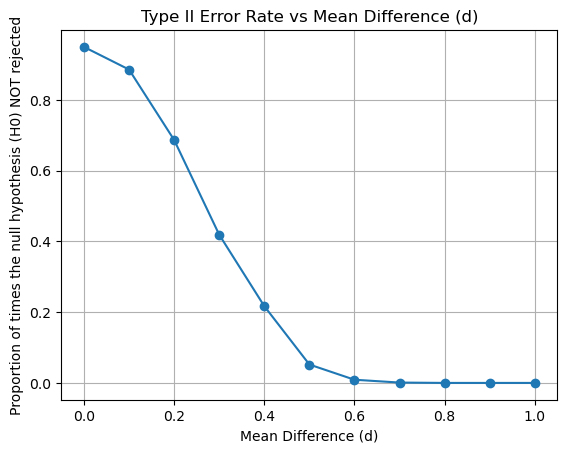

In [46]:
plt.plot(d_values, non_rejections_rates, marker='o')
plt.xlabel("Mean Difference (d)")
plt.ylabel("Proportion of times the null hypothesis (H0) NOT rejected")
plt.title("Type II Error Rate vs Mean Difference (d)")
plt.grid(True)
plt.show()

### 3.4 Summary / Explanation:
As the difference in means (effect size d) increases:

Type II error rate decreases
- When d = 0, there is no difference → the t-test never rejects → Type II error is highest.
- As d gets larger, the difference between the two groups becomes easier for the test to detect.
- The probability of failing to reject the null (Type II error) falls.

Eventually the Type II error rate approaches 0
- For large effect sizes (e.g., d ≥ 0.6–0.8), the t-test almost always detects the difference.
- The null hypothesis is rejected almost every time.

As the difference between group means increases, the t-test gets more powerful, and Type II errors become rare.

For further exploration and a comprehensive understanding of t-test, type I & type II errors, refer to the following resources:

https://stats.libretexts.org/Courses/Adler_University/Graduate-Level_Statistics_in_Psychology/08%3A_Probability_Hypothesis_Testing_Type_I_and_Type_II_Errors \
https://www.scribbr.com/statistics/type-i-and-type-ii-errors/ \
https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Mostly_Harmless_Statistics_(Webb)/08%3A_Hypothesis_Tests_for_One_Population/8.02%3A_Type_I_and_II_Errors
https://statisticsbyjim.com/basics/negative-correlation/

## **Problem 4: ANOVA** (Analysis of Variance)
As per [assessment instructions](https://github.com/ianmcloughlin/applied-statistics/blob/main/assessment/assessment.md):

This problem contrasts two methods for comparing multiple group means.

    Task: Generate three independent samples (n=30) from normal distributions with means 0, 0.5, and 1 (all SD=1).

    Tests:

        Perform a one-way ANOVA on the three samples.

        Perform three independent two-sample t-tests (1 vs 2, 1 vs 3, 2 vs 3).

    Analysis: Compare the conclusions reached by the ANOVA and the multiple t-tests. Write a short note explaining why ANOVA is the preferred method over running several independent t-tests in this scenario (addressing the family-wise error rate).


### 4.1 Simulation parameters:

In [47]:
sample_size = 30 
# True means for the three groups.
means = [0, 0.5, 1.0] 
standard_deviation = 1.0
alpha = 0.05 # Significance level for interpretation.

### 4.2 Generate samples:
4.2.1 Generate three independent samples (n=30) from normal distributions with means 0, 0.5, and 1 (all SD=1).

In [ ]:
# Generate samples.
sample1 = np.random.normal(loc=means[0], scale=standard_deviation, size=sample_size)
sample2 = np.random.normal(loc=means[1], scale=standard_deviation, size=sample_size)
sample3 = np.random.normal(loc=means[2], scale=standard_deviation, size=sample_size)

# Print the samples.
print("Sample 1 (mean=0):", sample1)
print("Sample 2 (mean=0.5):", sample2)
print("Sample 3 (mean=1):", sample3)

Sample 1 (mean=0): [-0.18948329  1.77468785  1.8072423  -1.16024951  1.42554637 -0.39454037
 -0.76428759  0.52399364 -0.55746898 -1.18437861  0.97085137 -0.61884551
  1.12129947 -0.50404998  0.37437911  0.79311327  0.02864321  0.90026507
  0.54326837 -0.67815114 -1.1327721   0.32418181 -1.02673715  0.85944164
  0.28097663  0.02386177 -0.69493398  1.91234223  0.95157444 -0.29206585]
Sample 2 (mean=0.5): [ 0.73635709  0.74469723  2.05263642  0.78910213  1.17253457  0.39605492
  0.23100002  1.28277805  1.53446403  1.07738737  0.06797588  1.0294064
  2.38296722  0.78386964  2.18275239  0.18393034  2.63167365 -0.54490631
  2.12547543  0.97508547  2.39787383  1.33803553  1.78447985 -1.15819456
 -0.11970134  2.03841137 -0.14943442  0.9666136   1.13795905  1.50424653]
Sample 3 (mean=1): [-1.23571221  1.73885544  2.76108108  2.57919441  0.804852   -0.95215256
  1.48556336  0.78004037  1.55458597  2.09243353  0.34925177 -0.12068327
  1.79020514  1.80660352  1.65598401  0.80825599  0.57678715  1.

Each sample contains n=30 observations. When an ANOVA is performed on these specific arrays, the test compares the variance between these means (0,0.5,1) against the variance within each list to determine if the differences are statistically significant or just due to the random sampling "noise" you see in the numbers:

- Sample 1 (Population μ=0): This represents the baseline or "control" group. The individual values vary around zero, representing the natural "noise" in the data.

- Sample 2 (Population μ=0.5): This group has a small positive shift. As noted in the generated samples, a mean difference of 0.5 is often a "tipping point" where the signal becomes strong enough for the test to detect it reliably (95% Power).

- Sample 3 (Population μ=1): This group has the largest shift. Because the mean difference is 1.0 (equal to the standard deviation), the "signal" is very clear. As the explanation for "Large   Effects" describes, the error rate for detecting this difference drops to near zero because the values in this sample are noticeably higher than those in Sample 1.

4.2.2 Create Histogram for visual representation of data.

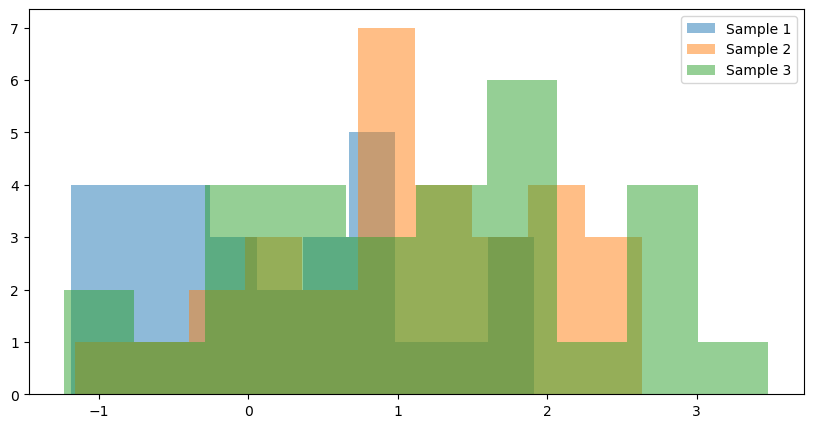

In [ ]:
# Create histograms.
# Code was copied from lecture material.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample1, bins=10, alpha=0.5, label='Sample 1')

# Histogram of the second sample.
ax.hist(sample2, bins=10, alpha=0.5, label='Sample 2')

# Histogram of the third sample.
ax.hist(sample3, bins=10, alpha=0.5, label='Sample 3')

# Add a legend.
ax.legend();

### 4.3 Test:
4.3.1 Perform a one-way ANOVA on the three samples.

In [50]:
f_stat, p_value = stats.f_oneway(sample1, sample2, sample3) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

# Display the results.
print("\nOne-Way ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")


One-Way ANOVA Results:
F-statistic: 8.0697
P-value: 0.0006


These results indicate a highly statistically significant difference between your group means. In simple terms, it is very unlikely that the differences we are seeing between the groups happened by chance.

The F-statistic is a ratio of variance between groups to variance within groups.

Between-group variance: How much the group means differ from each other.

Within-group variance: The "noise" or spread of data points inside each individual group.

Generally, the further the F-value is from 1.0, the more likely the groups are truly different.

The p-value tells us the probability that we would get an F-statistic this large if all the group means were actually identical (if the null hypothesis were true).

Significance: Since this is much lower than the standard threshold of 0.05 (5%), we reject the null hypothesis.

Confidence: Since the p-value is much smaller than 0.01 we can be confident that the differences between our groups are real and not just random sampling error.

In [51]:
# If else statement to interpret the results.
if p_value < alpha:
    interpretation = "REJECT the null hypothesis (H0)."
    conclusion = "There is statistically significant evidence that at least one group mean is different from the others."
else:
    interpretation = "FAIL TO REJECT the null hypothesis (H0)."
    conclusion = "There is NO statistically significant evidence that the group means are different."

print(f"Decision (at alpha={alpha}): {interpretation}")
print(f"Conclusion: {conclusion}")

Decision (at alpha=0.05): REJECT the null hypothesis (H0).
Conclusion: There is statistically significant evidence that at least one group mean is different from the others.


4.3.2 Perform three independent two-sample t-tests (1 vs 2, 1 vs 3, 2 vs 3).

In [ ]:
# The order corresponds to: (1 vs 2), (1 vs 3), (2 vs 3).
comparison_pairs = [
    (sample1, sample2),
    (sample1, sample3),
    (sample2, sample3)
]

# Function to run and report the t-test for a given pair.
def run_and_report_t_test(comparison_id, sample_a, sample_b, alpha):
       
    # Calculate sample means for display.
    mean_a = sample_a.mean()
    mean_b = sample_b.mean()
    
    # Perform the independent two-sample t-test.
    t_stat, p_value = stats.ttest_ind(sample_a, sample_b, equal_var=True)
    
    # Determine significance.
    is_significant = p_value < alpha
    decision = "Reject H0 (Significant)" if is_significant else "Fail to Reject H0 (Not Significant)"
    
    # Print the results using a generic comparison ID.
    print(f"\nComparison {comparison_id}: (Mean 1={mean_a:.3f}) vs. (Mean 2={mean_b:.3f})")
    print(f"  T-Statistic: {t_stat:.4f}")
    print(f"  P-value:     {p_value:.4f}")
    print(f"  Decision:    {decision} (at alpha={alpha})")

# Perform the three independent two-sample t-tests.
# The loop unpacks the two sample arrays. We use enumerate for sequential labeling.
for i, (sample_a, sample_b) in enumerate(comparison_pairs, 1):
    run_and_report_t_test(i, sample_a, sample_b, alpha)


Comparison 1: (Mean 1=0.181) vs. (Mean 2=1.053)
  T-Statistic: -3.6304
  P-value:     0.0006
  Decision:    Reject H0 (Significant) (at alpha=0.05)

Comparison 2: (Mean 1=0.181) vs. (Mean 2=1.125)
  T-Statistic: -3.4739
  P-value:     0.0010
  Decision:    Reject H0 (Significant) (at alpha=0.05)

Comparison 3: (Mean 1=1.053) vs. (Mean 2=1.125)
  T-Statistic: -0.2672
  P-value:     0.7903
  Decision:    Fail to Reject H0 (Not Significant) (at alpha=0.05)


### 4.4 Conclusion - Why ANOVA is the Preferred Method

ANOVA is the preferred statistical method for comparing the means of three or more independent groups because it effectively controls the Family-Wise Error Rate (FWER).

The Problem with Multiple t-tests (FWER Inflation): Each independent t-test is performed with a set Per-Comparison Error Rate (αPC​), typically α=0.05. This means every single test has a 5% chance of resulting in a Type I Error (a false positive).

By performing a "family" of multiple comparisons on the same data set, the overall probability of incurring at least one Type I Error across the entire set escalates dramatically. This inflated overall risk is the Family-Wise Error Rate (αFW​).

Therefore, when performing multiple comparisons after an ANOVA, formal post-hoc tests (e.g., Tukey's HSD or Bonferroni correction) must be used. These methods adjust the significance level for each comparison, ensuring the FWER remains controlled.

For further exploration and a comprehensive understanding of ANOVA (Analysis of Variance), F-Statisitc, Family-Wise Error Rate (FWER) and Tukey's HSD or Bonferroni correction refer to the following resources:

YouTube: Why Is ANOVA Used Instead Of Multiple T-tests? - The Friendly Statistician https://www.youtube.com/watch?v=5B2o9v8oP0g \
https://researchmethod.net/anova/ \
https://en.wikipedia.org/wiki/Bonferroni_correction \
https://en.wikipedia.org/wiki/Family-wise_error_rate \
https://statisticsbyjim.com/basics/effect-sizes-statistics/ \
https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/

### End.